# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
### <span style='font-family:"Times New Roman"'>Designing Butterworth filter to remove miore pattern from image. 

# <span style='font-family:"Times New Roman"'>Loading Required Package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

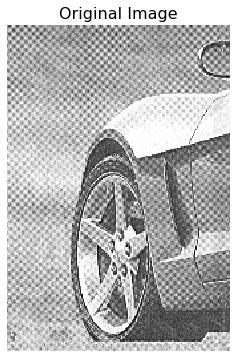

In [2]:
fig = plt.figure(figsize=(18, 6))
I = mpimg.imread('car-moire-pattern.tif')
imgplot = plt.imshow(I, cmap = 'gray')
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.show()

In [3]:
Magorg = np.fft.fft2(I)
magnitude= np.log(np.abs(np.fft.fftshift(Magorg)))

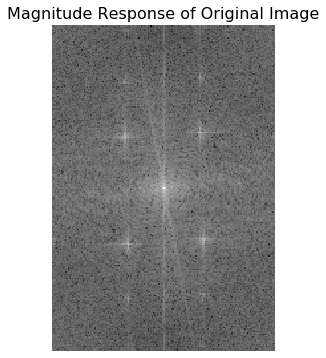

In [4]:
fig = plt.figure(figsize=(18, 6))
img=plt.imshow(magnitude,cmap = 'gray')
plt.title('Magnitude Response of Original Image', fontsize = 16)
plt.axis('off')
plt.show()

In [5]:
n = int(I.shape[0]/2)                #Pad Size
I_padded = np.pad(I, ((n,n),(n,n)), 'constant', constant_values = 0)

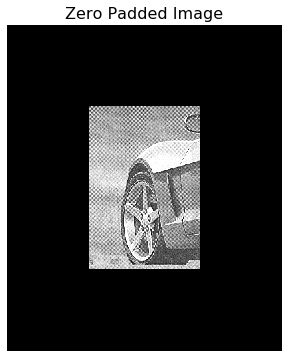

In [6]:
fig = plt.figure(figsize=(18, 6))
imgplot = plt.imshow(I_padded, cmap = 'gray')
plt.title('Zero Padded Image', fontsize = 16)
plt.axis('off')
plt.show()

# <span style='font-family:"Times New Roman"'>Filter Design Function

In [7]:
H1 = np.zeros(I_padded.shape)
H2 = np.zeros(I_padded.shape)
H3 = np.zeros(I_padded.shape)
H4 = np.zeros(I_padded.shape)
for i in range(int(I_padded.shape[0])):
        for j in range(int(I_padded.shape[1])):
            Dist1p = math.sqrt(((i-int(I_padded.shape[0]/2)+160)**2)+((j-int(I_padded.shape[1]/2)+70)**2))
            Dist1n = math.sqrt(((i-int(I_padded.shape[0]/2)+160)**2)+((j-int(I_padded.shape[1]/2)-70)**2))
            Dist2p = math.sqrt(((i-int(I_padded.shape[0]/2)+80)**2)+((j-int(I_padded.shape[1]/2)+70)**2))
            Dist2n = math.sqrt(((i-int(I_padded.shape[0]/2)+80)**2)+((j-int(I_padded.shape[1]/2)-70)**2))
            Dist3p = math.sqrt(((i-int(I_padded.shape[0]/2)-80)**2)+((j-int(I_padded.shape[1]/2)+70)**2))
            Dist3n = math.sqrt(((i-int(I_padded.shape[0]/2)-80)**2)+((j-int(I_padded.shape[1]/2)-70)**2))
            Dist4p = math.sqrt(((i-int(I_padded.shape[0]/2)-160)**2)+((j-int(I_padded.shape[1]/2)+70)**2))
            Dist4n = math.sqrt(((i-int(I_padded.shape[0]/2)-160)**2)+((j-int(I_padded.shape[1]/2)-70)**2)) 
            if Dist1p == 0:
                H1[i,j] = 0
            else:
                if Dist1n == 0:
                    H1[i,j] = 0
                else:
                    H1[i,j] = (1/(1+(18/Dist1p)**16))*(1/(1+(18/Dist1n)**16))
            if Dist2p == 0:
                H2[i,j] = 0
            else:
                if Dist2n == 0:
                    H2[i,j] = 0
                else:
                    H2[i,j] = (1/(1+(18/Dist2p)**16))*(1/(1+(18/Dist2n)**16))
            if Dist3p == 0:
                H3[i,j] = 0
            else:
                if Dist3n == 0:
                    H3[i,j] = 0
                else:
                    H3[i,j] = (1/(1+(18/Dist3p)**16))*(1/(1+(18/Dist3n)**16))
            if Dist4p == 0:
                H4[i,j] = 0
            else:
                if Dist4n == 0:
                    H4[i,j] = 0
                else:
                    H4[i,j] = (1/(1+(18/Dist4p)**16))*(1/(1+(18/Dist4n)**16))
H = H1*H2*H3*H4

In [8]:
NCFI = np.fft.fft2(I_padded)
CFI = np.fft.fftshift(NCFI)   # Centered Frequency
TI = CFI * (H)
UCTI = np.fft.fftshift(TI)
FI = np.real(np.fft.ifft2(UCTI))
FI = np.real(np.fft.ifft2(UCTI))
FI = np.delete(FI, range(n), axis=0)
FI = np.delete(FI, range(int(I.shape[0]), int(I.shape[0]) + n), axis=0)
FI = np.delete(FI, range(n), axis=1)
FI = np.delete(FI, range(int(I.shape[1]), int(I.shape[1]) + n), axis=1)

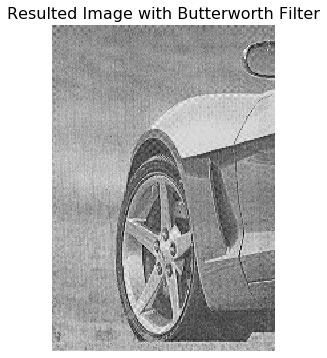

In [9]:
fig = plt.figure(figsize=(18, 6))
imgplot = plt.imshow(FI, cmap = 'gray')
plt.title('Resulted Image with Butterworth Filter', fontsize = 16)
plt.axis('off')
plt.show()

In [10]:
MagorgFI = np.fft.fft2(FI)
magnitudeFI= np.log(np.abs(np.fft.fftshift(MagorgFI)))

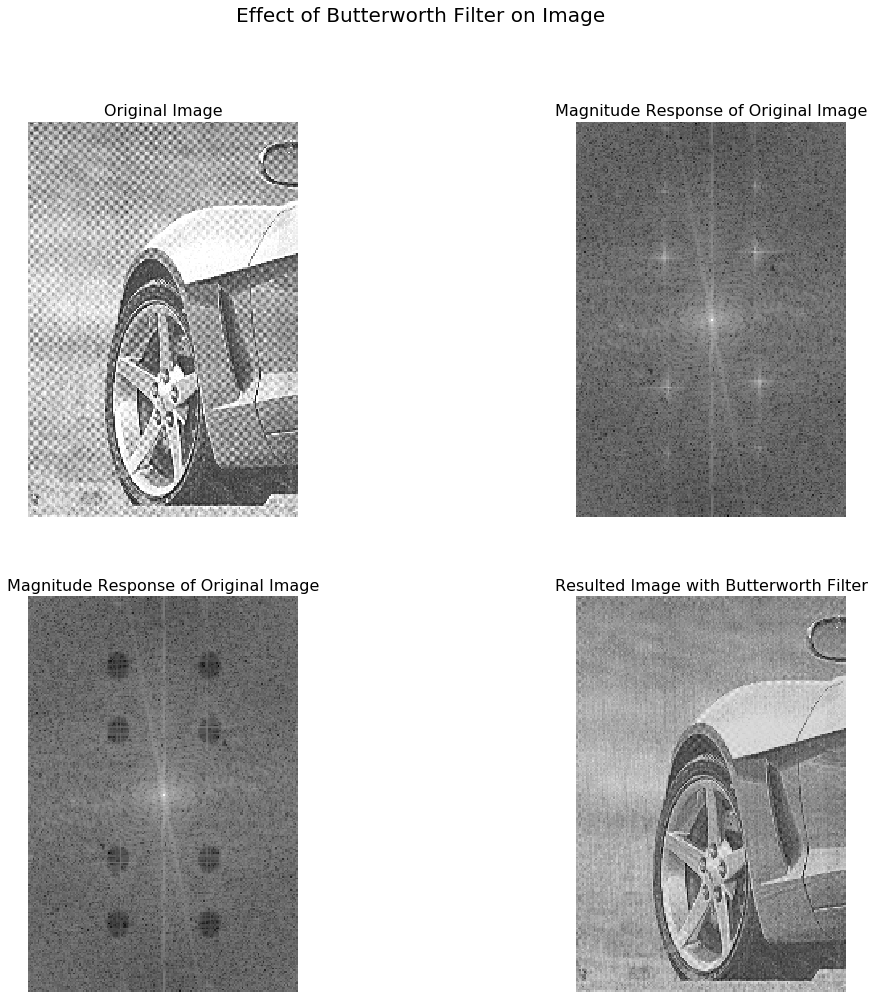

In [11]:
fig = plt.figure(figsize=(18, 16))
plt.subplot(2, 2, 1)
img=plt.imshow(I,cmap = 'gray')
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(magnitude,cmap = 'gray')
plt.title('Magnitude Response of Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(magnitudeFI,cmap = 'gray')
plt.title('Magnitude Response of Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(FI,cmap = 'gray')
plt.title('Resulted Image with Butterworth Filter', fontsize = 16)
plt.axis('off')
fig.suptitle('Effect of Butterworth Filter on Image', fontsize = 20)
plt.show()